In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
food_loss_data = "Resources\FAO_Food_Loss.csv"
gdp_values = "Resources\GDP_data_tai.csv"

In [3]:
food_loss_df = pd.read_csv(food_loss_data)
gdp_df = pd.read_csv(gdp_values)
food_loss_df = pd.DataFrame(food_loss_df)
food_loss_df.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,...,notes,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# filter out the empty columns
food_loss_clean = food_loss_df[["m49_code", "country", "region", "commodity", "year", "loss_percentage", "loss_percentage_original", "loss_quantity", "activity1", "activity2", "food_supply_stage", "treatment", "cause_of_loss"]]
food_loss_clean.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents


In [5]:
# Check number of rows per country
count_per_country = food_loss_clean.groupby("country")
count_per_country.count()

,m49_code,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
country,,,,,,,,,,,,
Africa,1,0,1,1,1,1,0,0,0,1,0,0
Algeria,2,0,2,2,2,2,0,0,0,2,0,0
Angola,726,0,726,726,726,726,0,726,220,616,0,0
Argentina,14,0,14,14,14,14,13,13,0,14,13,0
Armenia,38,0,38,38,38,38,0,20,8,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,16,0,16,16,16,16,8,11,3,15,11,0
Western Africa,4,0,4,4,4,4,0,4,0,4,0,0
Western Asia,5,0,5,5,5,5,0,5,2,5,0,0


In [6]:
# figure out which countries have the most data
count_per_country_sorted = count_per_country.count().sort_values(by="m49_code", ascending=False)
count_per_country_sorted.head(20)

,m49_code,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
country,,,,,,,,,,,,
United States of America,3094,0,3094,3094,3094,3094,13,191,96,3094,90,6
India,1354,140,1354,1354,1354,1354,111,1062,133,1351,46,136
Ethiopia,1064,27,1064,1064,1064,1064,8,1002,290,933,83,28
Kenya,1054,77,1054,1054,1054,1054,11,998,269,917,146,108
Uganda,866,31,866,866,866,866,7,851,279,734,8,18
Ghana,817,99,817,817,817,817,6,724,332,729,100,103
Malawi,803,14,803,803,803,803,9,747,223,693,29,18
Senegal,799,23,799,799,799,799,1,748,220,689,0,40
Zambia,772,5,772,772,772,772,1,762,220,684,4,8


In [7]:
# create df with our 15 African countries of choice
countries_list = ["Ethiopia", "Kenya", "Uganda", "Malawi", "Senegal", "Zambia", "Burkina Faso", "Angola", "Benin", "Mali", "United Republic of Tanzania", "Mozambique", "Rwanda", "Nigeria"]
african_data = food_loss_clean[food_loss_clean['country'].isin(countries_list)]
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [8]:
# rename/ re-characterize some rows

african_data.loc[african_data["activity1"] == "Storage", "food_supply_stage"] = "Storage"
african_data.loc[african_data["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
african_data.loc[african_data["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
african_data.loc[african_data["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
african_data.loc[african_data["activity1"] == "Drying", "food_supply_stage"] = "Farm"
african_data.loc[african_data["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [9]:
# isolate blank rows for food_supply_stage and activity1
blank_rows = african_data[african_data['food_supply_stage'].isnull() | (african_data['food_supply_stage'] == '') & (african_data['activity1'].isnull())]
blank_rows.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2903,204,Benin,NaN,Maize (corn),2000,17.80,2.1-33.5,NaN,NaN,NaN,NaN,NaN,NaN
9729,404,Kenya,NaN,Maize (corn),2012,15.15,9.7-20.6,NaN,NaN,NaN,NaN,NaN,NaN
10039,404,Kenya,NaN,Maize (corn),2006,5.75,3.9-7.6,NaN,NaN,NaN,NaN,NaN,NaN
10040,404,Kenya,NaN,Maize (corn),2006,24.20,19.3-29.1,NaN,NaN,NaN,NaN,NaN,NaN
10117,404,Kenya,NaN,Maize (corn),2004,14.25,13.5-15,NaN,NaN,NaN,NaN,NaN,Insects; Maize Stem Borer


In [10]:

# display african_data without blank rows for food_supply_stage
african_data = african_data.drop(blank_rows.index)
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [11]:
# find average of loss percentage for each supply stage and rank the results

amount_of_waste = african_data.groupby("food_supply_stage")["loss_percentage"].mean()
amount_of_waste_sorted = amount_of_waste.sort_values(ascending=False)
amount_of_waste_sorted = pd.DataFrame(amount_of_waste_sorted)
amount_of_waste_sorted.head()

,loss_percentage
food_supply_stage,
Export,25.750000
Retail,18.872182
Post-harvest,18.084444
Wholesale,15.080364
Whole supply chain,13.768627


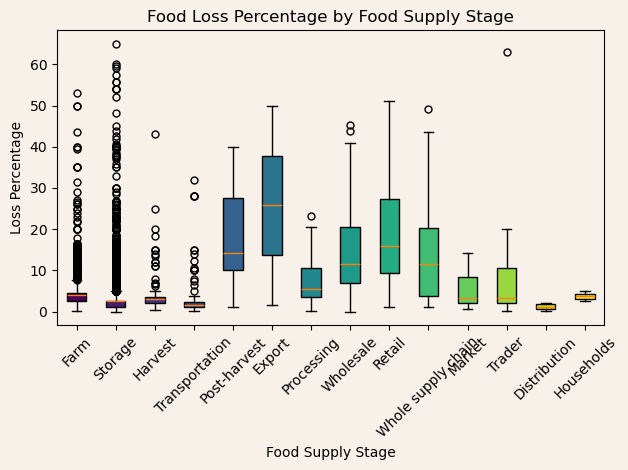

In [12]:
# Define flier properties
flierprops = dict(marker='o', markersize=5, linestyle='none')

# Create the data for the boxplot
box_data = [african_data[african_data['food_supply_stage'] == stage]['loss_percentage'] for stage in african_data['food_supply_stage'].unique()]

# Create the boxplot
boxplot = plt.boxplot(box_data, labels=african_data['food_supply_stage'].unique(), patch_artist=True, showfliers=True, flierprops=flierprops)

# Color code each boxplot with a different color
colors = plt.cm.viridis(np.linspace(0, 1, len(box_data)))  # Generate a list of colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the figure

# Set labels and title
plt.xlabel('Food Supply Stage')
plt.ylabel('Loss Percentage')
plt.title('Food Loss Percentage by Food Supply Stage')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
commodity_wasted = african_data.groupby("commodity")["loss_percentage"].mean()
commodity_wasted_sorted = commodity_wasted.sort_values(ascending=False)

In [14]:
waste_by_year = african_data.groupby("year")["loss_percentage"].mean()
waste_by_year_sorted = waste_by_year.sort_values(ascending=False)

In [15]:
# create a simple dataframe for waste by year
waste_by_year = pd.DataFrame(waste_by_year)
waste_by_year.reset_index(inplace=True)
waste_by_year.head()

,year,loss_percentage
0,1968,5.4000
1,1969,14.2500
2,1970,18.5000
3,1973,14.2500
4,1974,18.8525


In [16]:
# add simplified stages column to the african_data df
african_data["Simplified Supply Stage"] = ''
african_data.loc[african_data["food_supply_stage"] == "Farm", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Pre-harvest", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Harvest", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Post-harvest", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Storage", "Simplified Supply Stage"] = "Storage Stage"
african_data.loc[african_data["food_supply_stage"] == "Packing", "Simplified Supply Stage"] = "Storage Stage"
african_data.loc[african_data["food_supply_stage"] == "Stacking", "Simplified Supply Stage"] = "Storage Stage"
african_data.loc[african_data["food_supply_stage"] == "Transportation", "Simplified Supply Stage"] = "Transport Stage"
african_data.loc[african_data["food_supply_stage"] == "Distribution", "Simplified Supply Stage"] = "Transport Stage"
african_data.loc[african_data["food_supply_stage"] == "Export", "Simplified Supply Stage"] = "Export Stage"
african_data.loc[african_data["food_supply_stage"] == "Trader", "Simplified Supply Stage"] = "Export Stage"
african_data.loc[african_data["food_supply_stage"] == "Wholesale", "Simplified Supply Stage"] = "Wholesale Stage"
african_data.loc[african_data["food_supply_stage"] == "Market", "Simplified Supply Stage"] = "Wholesale Stage"
african_data.loc[african_data["food_supply_stage"] == "Processing", "Simplified Supply Stage"] = "Wholesale Stage"
african_data.loc[african_data["food_supply_stage"] == "Retail", "Simplified Supply Stage"] = "Retail Stage"
african_data.loc[african_data["food_supply_stage"] == "Food Services", "Simplified Supply Stage"] = "Retail Stage"
african_data.loc[african_data["food_supply_stage"] == "Households", "Simplified Supply Stage"] = "Household Stage"
african_data.loc[african_data["food_supply_stage"] == "Whole supply chain", "Simplified Supply Stage"] = "Whole Supply Chain"

In [17]:
# create df for GDP data
gdp_df = pd.DataFrame(gdp_df)
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264110,28419.264530,28449.712950,29329.081750,30918.483580,31902.809820,24008.127820,29127.759380,33300.838820,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.342518,166.263682,171.961916,182.018480,192.639989,202.847824,...,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,122.193931,127.732834,134.130070,139.291222,148.821355,156.314136,...,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620


In [18]:
# make a new dataframe for 2021 gdp
gdp_2021 = gdp_df[["Country Name", "2021"]]
gdp_2021 = pd.DataFrame(gdp_2021)
gdp_2021.head()

,Country Name,2021
0,Aruba,29127.759380
1,Africa Eastern and Southern,1545.956697
2,Afghanistan,355.777826
3,Africa Western and Central,1769.171853
4,Angola,1927.474078


In [19]:
# rename "Country Name" to "country" for easy merging
gdp_2021.rename(columns={'Country Name': 'country'}, inplace=True)
gdp_2021.head()

,country,2021
0,Aruba,29127.759380
1,Africa Eastern and Southern,1545.956697
2,Afghanistan,355.777826
3,Africa Western and Central,1769.171853
4,Angola,1927.474078


In [20]:
# find average loss by country
food_loss_recent = food_loss_clean[food_loss_clean['year'] >= 2011]
average_recent = food_loss_recent.groupby("country")["loss_percentage"].mean()
average_by_country = food_loss_clean.groupby("country")["loss_percentage"].mean()
average_recent

country
Angola                                 2.514557
Argentina                              0.503077
Armenia                                5.050000
Australia                             18.402326
Australia and New Zealand             42.000000
                                        ...    
Venezuela (Bolivarian Republic of)    37.000000
Viet Nam                               9.425000
Western Asia                          14.800000
Zambia                                 2.479753
Zimbabwe                               3.264272
Name: loss_percentage, Length: 116, dtype: float64

In [21]:
# create a dataframe for average loss by country
average_loss_df = { "country": food_loss_clean["country"].unique(), "average_loss": average_by_country}
average_recent_df = { "country": food_loss_recent["country"].unique(), "average_loss": average_recent}
average_loss_df = pd.DataFrame(average_loss_df)
average_recent_df = pd.DataFrame(average_recent_df)
average_loss_df.reset_index(drop=True, inplace=True)
average_recent_df.reset_index(drop=True, inplace=True)
average_recent_df

,country,average_loss
0,Myanmar,2.514557
1,Burundi,0.503077
2,Cambodia,5.050000
3,Cameroon,18.402326
4,Canada,42.000000
...,...,...
111,United Republic of Tanzania,37.000000
112,United States of America,9.425000
113,Burkina Faso,14.800000
114,Venezuela (Bolivarian Republic of),2.479753


In [22]:
# create a dataframe combining the first dataset with 2021 gdp
average_with_gdp = pd.merge(average_loss_df, gdp_2021, on="country")
average_recent_gdp = pd.merge(average_recent_df, gdp_2021, on="country")
average_recent_gdp

,country,average_loss,2021
0,Myanmar,2.514557,1233.227770
1,Burundi,0.503077,221.157803
2,Cambodia,5.050000,1625.235021
3,Cameroon,18.402326,1654.257037
4,Canada,42.000000,52496.844170
...,...,...,...
85,Tunisia,6.500000,3817.377174
86,Uganda,10.811413,883.892026
87,Ukraine,6.172656,4827.845703
88,Burkina Faso,14.800000,888.803611


In [23]:
# re-use our bins from before to designate classes
size_bins = [0, 1000, 5000, 15000, 50000, 150000]
labels = ["Low Income", "Lower Middle", "Middle", "Upper Middle", "High Income"]
average_with_gdp["GDP Class"] = pd.cut(average_with_gdp["2021"], 
                                    size_bins, labels=labels, include_lowest = True)
average_recent_gdp["GDP Class"] = pd.cut(average_recent_gdp["2021"], 
                                    size_bins, labels=labels, include_lowest = True)
average_recent_gdp.head()
average_with_gdp.head()

,country,average_loss,2021,GDP Class
0,Myanmar,30.000000,1233.227770,Lower Middle
1,Burundi,17.500000,221.157803,Low Income
2,Cambodia,1.038571,1625.235021,Lower Middle
3,Algeria,11.368421,4216.251285,Lower Middle
4,Cameroon,18.402326,1654.257037,Lower Middle


In [24]:
# create a dataframe for average loss by income class
average_loss_stats = average_with_gdp.groupby("GDP Class")["average_loss"].mean()
average_recent_stats = average_recent_gdp.groupby("GDP Class")["average_loss"].mean()
average_loss_df = pd.DataFrame({"Average Loss by Class" : average_loss_stats})
average_recent_df = pd.DataFrame({"Average Loss by Class" : average_recent_stats})
average_loss_df.head()

C:\Users\taire\AppData\Local\Temp\ipykernel_14264\1469004866.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_loss_stats = average_with_gdp.groupby("GDP Class")["average_loss"].mean()
C:\Users\taire\AppData\Local\Temp\ipykernel_14264\1469004866.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_recent_stats = average_recent_gdp.groupby("GDP Class")["average_loss"].mean()


,Average Loss by Class
GDP Class,
Low Income,8.794127
Lower Middle,9.396455
Middle,12.318256
Upper Middle,8.042649
High Income,15.390491


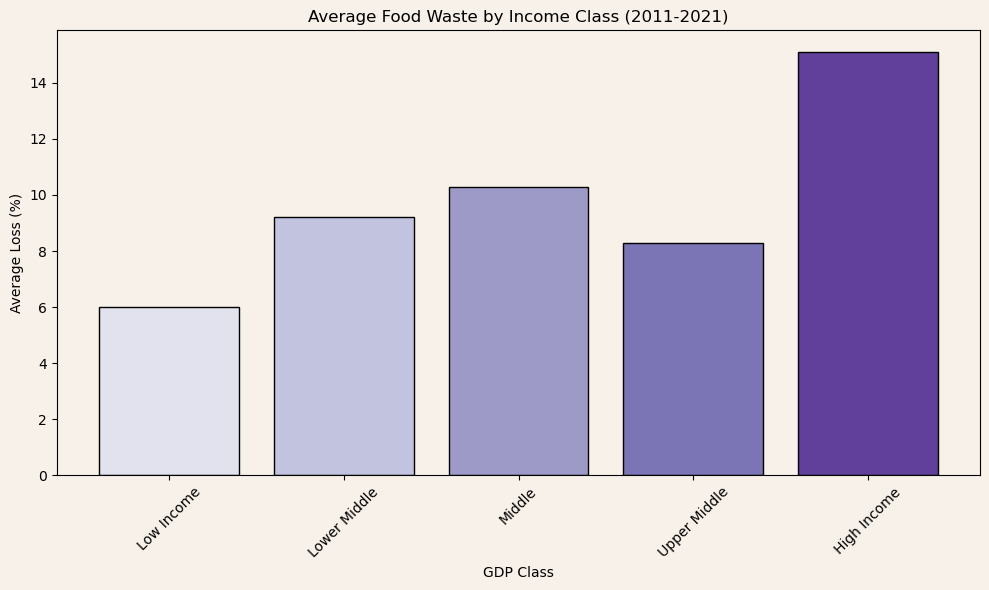

In [25]:
# Create a custom colormap with different shades of purple
purples = plt.cm.Purples(np.linspace(0.2, 0.8, len(average_recent_df)))

# Plot the bar graph with custom purple colors
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(average_recent_df.index, average_recent_df['Average Loss by Class'], color=purples, edgecolor='black')

# Set labels and title
ax.set_xlabel("GDP Class")
ax.set_ylabel("Average Loss (%)")
ax.set_title("Average Food Waste by Income Class (2011-2021)")

# Rotate x-ticks for better readability
plt.xticks(ticks=np.arange(len(average_recent_df.index)), labels=average_recent_df.index, rotation=45)

# Change the background color
ax.set_facecolor('#F8F1E9')  # Set the background color of the plot area
fig.patch.set_facecolor('#F8F1E9')  # Set the background color of the figure

# Adjust layout and save the figure
plt.tight_layout()


# Show the plot
plt.show()